In [2]:
import tensorflow as tf
import numpy as np
# Then Set Random Seeds
tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)
# Then run the Enable Deterministic Operations Function
tf.config.experimental.enable_op_determinism()
import regex as re
import pandas as pd
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import layers, optimizers, regularizers
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import set_config
from pprint import pprint
set_config(transform_output='pandas')
pd.set_option('display.max_colwidth', 250)

In [3]:
df = pd.read_csv("data/positions_salaries.csv")
df

,job_title,job_description,salary_string
0,Spa Therapist,· High school qualification with minimum 2 years of relevant experience or Bachelor’s degree or equivalent with minimum 1 year of relevant experience\n· Massage diploma from a recognized school/training center\n· Beauty therapy qualification or b...,"QAR 4,000 - QAR 5,000 a month"
1,Registered Triage Nurse NHS (Relocation Package),"Triage Nurse (Registered Nurse) – Unique Opportunity for Accelerated Career Progression - South Western Ambulance Service (SWAST) – NHS Devon, UK\nWe are the Devon Alliance for International Recruitment and we are part of NHS. We are delighted to...","QAR 148,490 - QAR 178,808 a year"
2,Sales & Marketing specialist - Food & Beverage,"● Minimum Experience of 3 Years in F&B Devision\n● Gaining comprehensive knowledge of the company products, branding guidelines, production lines, and vision, in order to promote the company products to B2B & B2C clients\n● Developing and impleme...","QAR 5,000 - QAR 6,000 a month"
3,Food Service Crew (Female),"LOCAL HIRE (Must be in Doha-Qatar)\nPreferably FEMALE\nPerforms a wide range of duties involved with preparing and/or serving foods and beverages\nAssist in cleaning work areas, equipment, utensils.\nMay assist in the set up, and service; and col...","QAR 2,500 a month"
4,Digital Print Operator,We are hiring - Digital Print Operator\nQAR 3500 + accommodation + transportation\nMale\nMinimum 2 - 3 years relevant experience\nOffice - C Ring\n8am to 5pm Fri and Sat OFF\nQID with NOC is preferred\nVisa holders will be accepted as well\nJob T...,"QAR 3,400 - QAR 3,500 a month"
...,...,...,...
995,Road Chargehand (TC23002),"Emirates General Services Enterprises (_EGSE_) is one of the most reputed and leading Recruitment & Manpower Suppliers in U.A.E, based in Abu Dhabi.\nBlended with 30+ years of experience in this line, we are in a very advantageous position to rec...","AED3,000 a month"
996,Internal Auditor,"Perform and control the full audit cycle including risk management and control management over operations’ effectiveness, financial reliability and compliance with all applicable orders and regulations\nDetermine internal audit scope and develop ...","AED7,000 - AED7,500 a month"
997,Tele sales Executive (Female),We are looking for an enthusiastic Tele sales Representative to contribute in generating sales for our company. You will be responsible for Generating Leads and follow up and closing sales deals over the phone.\nJob Profile\nIdentify potential cu...,"AED2,500 - AED3,500 a month"
998,Commis Chef,We are looking to hire a hard-working and efficient commis chef to prepare meal ingredients for the chef de partie and assist with various kitchen duties. The commis chef's responsibilities include informing the supervisor of malfunctioning or br...,"AED2,500 - AED3,500 a month"


## Custom Functions

In [4]:
"""
custom_functions.py from Course 06: AML
"""
import tensorflow as tf
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
import spacy


## Writing a demo custom function for .py file
def demo_function(name):
    print(f'Hello, {name}!')


def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False,values_format=".2f"):
    """Modified version of classification metrics function from Intro to Machine Learning.
    Updates:
    - Reversed raw counts confusion matrix cmap  (so darker==more).
    - Added arg for normalized confusion matrix values_format
    """
    # Get the classification report
    report = classification_report(y_true, y_pred)

    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)

    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)

    # Create a confusion matrix  of raw counts (left subplot)
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=None,
                                            cmap='gist_gray_r',# Updated cmap
                                            values_format="d",
                                            colorbar=colorbar,
                                            ax = axes[0]);
    axes[0].set_title("Raw Counts")

    # Create a confusion matrix with the data with normalize argument
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=normalize,
                                            cmap=cmap,
                                            values_format=values_format, #New arg
                                            colorbar=colorbar,
                                            ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")

    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()

    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict


def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict



def evaluate_classification_network(model,
                                    X_train=None, y_train=None,
                                    X_test=None, y_test=None,
                                    history=None, history_figsize=(6,6),
                                    figsize=(6,4), normalize='true',
                                    output_dict = False,
                                    cmap_train='Blues',
                                    cmap_test="Reds",
                                    values_format=".2f",
                                    colorbar=False):
    """Evaluates a neural network classification task using either
    separate X and y arrays or a tensorflow Dataset

    Data Args:
        X_train (array, or Dataset)
        y_train (array, or None if using a Dataset
        X_test (array, or Dataset)
        y_test (array, or None if using a Dataset)
        history (history object)
        """
    # Plot history, if provided
    if history is not None:
        plot_history(history, figsize=history_figsize)
    ## Adding a Print Header
    print("\n"+'='*80)
    print('- Evaluating Network...')
    print('='*80)
    ## TRAINING DATA EVALUATION
    # check if X_train was provided
    if X_train is not None:
        ## Check if X_train is a dataset
        if hasattr(X_train,'map'):
            # If it IS a Datset:
            # extract y_train and y_train_pred with helper function
            y_train, y_train_pred = get_true_pred_labels(model, X_train)
        else:
            # Get predictions for training data
            y_train_pred = model.predict(X_train)
        ## Pass both y-vars through helper compatibility function
        y_train = convert_y_to_sklearn_classes(y_train)
        y_train_pred = convert_y_to_sklearn_classes(y_train_pred)

        # Call the helper function to obtain regression metrics for training data
        results_train = classification_metrics(y_train, y_train_pred,
                                         output_dict=True, figsize=figsize,
                                             colorbar=colorbar, cmap=cmap_train,
                                               values_format=values_format,
                                         label='Training Data')

        ## Run model.evaluate
        print("\n- Evaluating Training Data:")
        print(model.evaluate(X_train, return_dict=True))

    # If no X_train, then save empty list for results_train
    else:
        results_train = []
    ## TEST DATA EVALUATION
    # check if X_test was provided
    if X_test is not None:
        ## Check if X_train is a dataset
        if hasattr(X_test,'map'):
            # If it IS a Datset:
            # extract y_train and y_train_pred with helper function
            y_test, y_test_pred = get_true_pred_labels(model, X_test)
        else:
            # Get predictions for training data
            y_test_pred = model.predict(X_test)
        ## Pass both y-vars through helper compatibility function
        y_test = convert_y_to_sklearn_classes(y_test)
        y_test_pred = convert_y_to_sklearn_classes(y_test_pred)

        # Call the helper function to obtain regression metrics for training data
        results_test = classification_metrics(y_test, y_test_pred,
                                         output_dict=True, figsize=figsize,
                                             colorbar=colorbar, cmap=cmap_test,
                                              values_format=values_format,
                                         label='Test Data')

        ## Run model.evaluate
        print("\n- Evaluating Test Data:")
        print(model.evaluate(X_test, return_dict=True))

    # If no X_test, then save empty list for results_test
    else:
        results_test = []

    # Store results in a dictionary
    results_dict = {'train':results_train,
                    'test': results_test}
    if output_dict == True:
        return results_dict


def plot_history(history,figsize=(6,8)):
    # Get a unique list of metrics
    all_metrics = np.unique([k.replace('val_','') for k in history.history.keys()])
    # Plot each metric
    n_plots = len(all_metrics)
    fig, axes = plt.subplots(nrows=n_plots, figsize=figsize)
    axes = axes.flatten()
    # Loop through metric names add get an index for the axes
    for i, metric in enumerate(all_metrics):
        # Get the epochs and metric values
        epochs = history.epoch
        score = history.history[metric]
        # Plot the training results
        axes[i].plot(epochs, score, label=metric, marker='.')
        # Plot val results (if they exist)
        try:
            val_score = history.history[f"val_{metric}"]
            axes[i].plot(epochs, val_score, label=f"val_{metric}",marker='.')
        except:
            pass
        finally:
            axes[i].legend()
            axes[i].set(title=metric, xlabel="Epoch",ylabel=metric)
    # Adjust subplots and show
    fig.tight_layout()
    plt.show()

def convert_y_to_sklearn_classes(y, verbose=False):
    # If already one-dimension
    if np.ndim(y)==1:
        if verbose:
            print("- y is 1D, using it as-is.")
        return y

    # If 2 dimensions with more than 1 column:
    elif y.shape[1]>1:
        if verbose:
            print("- y is 2D with >1 column. Using argmax for metrics.")
        return np.argmax(y, axis=1)

    else:
        if verbose:
            print("y is 2D with 1 column. Using round for metrics.")
        return np.round(y).flatten().astype(int)


def get_true_pred_labels(model,ds):
    """Gets the labels and predicted probabilities from a Tensorflow model and Dataset object.
    Adapted from source: https://stackoverflow.com/questions/66386561/keras-classification-report-accuracy-is-different-between-model-predict-accurac
    """
    y_true = []
    y_pred_probs = []

    # Loop through the dataset as a numpy iterator
    for images, labels in ds.as_numpy_iterator():

        # Get prediction with batch_size=1
        y_probs = model.predict(images, batch_size=1, verbose=0)
        # Combine previous labels/preds with new labels/preds
        y_true.extend(labels)
        y_pred_probs.extend(y_probs)
    ## Convert the lists to arrays
    y_true = np.array(y_true)
    y_pred_probs = np.array(y_pred_probs)

    return y_true, y_pred_probs


from pprint import pprint
def make_text_vectorization_layer(train_ds,  max_tokens=None,
                                  split='whitespace',
                                  standardize="lower_and_strip_punctuation",
                                  output_mode="int",
                                  output_sequence_length=None,
                                  ngrams=None, pad_to_max_tokens=False,
                                  verbose=True,
                                  **kwargs,
                                 ):
    # Build the text vectorization layer
    text_vectorizer = tf.keras.layers.TextVectorization(
        max_tokens=max_tokens,
        standardize=standardize,
        output_mode=output_mode,
        output_sequence_length=output_sequence_length,
        **kwargs
    )
    # Get just the text from the training data
    if isinstance(train_ds, (np.ndarray, list, tuple, pd.Series)):
        ds_texts = train_ds
    else:
        try:
            ds_texts = train_ds.map(lambda x, y: x )
        except:
            ds_texts = train_ds

    # Fit the layer on the training texts
    text_vectorizer.adapt(ds_texts)


    if verbose:
        # Print the params
        print( "\ntf.keras.layers.TextVectorization(" )
        config = text_vectorizer.get_config()
        pprint(config,indent=4)
        print(")")

    # SAVING VOCAB FOR LATER
    # Getting list of vocab
    vocab = text_vectorizer.get_vocabulary()
    # Save dictionaries to look up words from ints
    int_to_str  = {idx:word for idx, word in enumerate(vocab)}

    return text_vectorizer, int_to_str


def batch_preprocess_texts(
    texts,
    nlp=None,
    remove_stopwords=True,
    remove_punct=True,
    use_lemmas=False,
    disable=["ner"],
    batch_size=50,
    n_process=-1,
):
    """Efficiently preprocess a collection of texts using nlp.pipe()
    Args:
        texts (collection of strings): collection of texts to process (e.g. df['text'])
        nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None; if None, it creates a default 'en_core_web_sm' pipe.
        remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
        remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
        use_lemmas (bool, optional): lemmatize tokens. Defaults to False.
        disable (list of strings, optional): named pipeline elements to disable. Defaults to ["ner"]: Used with nlp.pipe(disable=disable)
        batch_size (int, optional): Number of texts to process in a batch. Defaults to 50.
        n_process (int, optional): Number of CPU processors to use. Defaults to -1 (meaning all CPU cores).
    Returns:
        list of tokens
    """
    # from tqdm.notebook import tqdm
    from tqdm import tqdm
    if nlp is None:
        nlp = spacy.load("en_core_web_sm")
    processed_texts = []
    for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size, n_process=n_process)):
        tokens = []
        for token in doc:
            # Check if should remove stopwords and if token is stopword
            if (remove_stopwords == True) and (token.is_stop == True):
                # Continue the loop with the next token
                continue
            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_punct == True):
                continue
            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_space == True):
                continue

            ## Determine final form of output list of tokens/lemmas
            if use_lemmas:
                tokens.append(token.lemma_.lower())
            else:
                tokens.append(token.text.lower())
        processed_texts.append(tokens)
    return processed_texts



def get_ngram_measures_finder(tokens, ngrams=2, measure='raw_freq', top_n=None, min_freq = 1,
                             words_colname='Words'):
    import nltk
    if ngrams == 4:
        MeasuresClass = nltk.collocations.QuadgramAssocMeasures
        FinderClass = nltk.collocations.QuadgramCollocationFinder

    elif ngrams == 3:
        MeasuresClass = nltk.collocations.TrigramAssocMeasures
        FinderClass = nltk.collocations.TrigramCollocationFinder
    else:
        MeasuresClass = nltk.collocations.BigramAssocMeasures
        FinderClass = nltk.collocations.BigramCollocationFinder

    measures = MeasuresClass()


    finder = FinderClass.from_words(tokens)
    finder.apply_freq_filter(min_freq)
    if measure=='pmi':
        scored_ngrams = finder.score_ngrams(measures.pmi)
    else:
        measure='raw_freq'
        scored_ngrams = finder.score_ngrams(measures.raw_freq)

    df_ngrams = pd.DataFrame(scored_ngrams, columns=[words_colname, measure.replace("_",' ').title()])
    if top_n is not None:
        return df_ngrams.head(top_n)
    else:
        return df_ngrams


def classification_metrics_streamlit(y_true, y_pred, label='',
                           figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False,values_format=".2f",
                                    class_names=None):
    """Modified version of classification metrics function from Intro to Machine Learning.
    Updates:
    - Reversed raw counts confusion matrix cmap  (so darker==more).
    - Added arg for normalized confusion matrix values_format
    """
    # Get the classification report
    report = classification_report(y_true, y_pred,target_names=class_names)

    ## Save header and report
    header = "-"*70
    final_report = "\n".join([header,f" Classification Metrics: {label}", header,report,"\n"])

    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)

    # Create a confusion matrix  of raw counts (left subplot)
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=None,
                                            cmap='gist_gray_r',# Updated cmap
                                            display_labels = class_names, # Added display labels
                                            values_format="d",
                                            colorbar=colorbar,
                                            ax = axes[0]);
    axes[0].set_title("Raw Counts")

    # Create a confusion matrix with the data with normalize argument
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=normalize,
                                            cmap=cmap,
                                            values_format=values_format, #New arg
                                            display_labels = class_names, # Added display labels
                                            colorbar=colorbar,
                                            ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")

    # Adjust layout and show figure
    fig.tight_layout()

    return final_report, fig

def classification_metrics_streamlit_tensorflow(model,X_train=None, y_train=None,
                                                label='Training Data',
                                    figsize=(6,4), normalize='true',
                                    output_dict = False,
                                    cmap_train='Blues',
                                    cmap_test="Reds",
                                    values_format=".2f",
                                                class_names = None,
                                    colorbar=False):

    ## Check if X_train is a dataset
    if hasattr(X_train,'map'):
        # If it IS a Datset:
        # extract y_train and y_train_pred with helper function
        y_train, y_train_pred =get_true_pred_labels(model, X_train)
    else:
        # Get predictions for training data
        y_train_pred = model.predict(X_train)


     ## Pass both y-vars through helper compatibility function
    y_train = convert_y_to_sklearn_classes(y_train)
    y_train_pred = convert_y_to_sklearn_classes(y_train_pred)

    # Call the helper function to obtain regression metrics for training data
    report, conf_mat = classification_metrics_streamlit(y_train, y_train_pred,
                                                        figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                                        values_format=values_format,label=label,
                                                       class_names=class_names)
    return report, conf_mat

In [5]:


def evaluate_Regression_network(model,
                                    X_train=None, y_train=None,
                                    X_test=None, y_test=None,
                                    history=None, history_figsize=(6,6),
                                    figsize=(6,4), normalize='true',
                                    output_dict = False,
                                    cmap_train='Blues',
                                    cmap_test="Reds",
                                    values_format=".2f",
                                    colorbar=False):
    # Plot history, if provided
    if history is not None:
        plot_history(history, figsize=history_figsize)
    ## Adding a Print Header
    print("\n"+'='*80)
    print('- Evaluating Network...')
    print('='*80)
    ## TRAINING DATA EVALUATION
    # check if X_train was provided
    if X_train is not None:
        ## Check if X_train is a dataset
        if hasattr(X_train,'map'):
            # If it IS a Datset:
            # extract y_train and y_train_pred with helper function
            y_train, y_train_pred = get_true_pred_labels(model, X_train)
        else:
            # Get predictions for training data
            y_train_pred = model.predict(X_train)
        ## Pass both y-vars through helper compatibility function
        y_train = convert_y_to_sklearn_classes(y_train)
        y_train_pred = convert_y_to_sklearn_classes(y_train_pred)

        # Call the helper function to obtain regression metrics for training data
        # results_train = classification_metrics(y_train, y_train_pred,
        #                                  output_dict=True, figsize=figsize,
        #                                      colorbar=colorbar, cmap=cmap_train,
        #                                        values_format=values_format,
        #                                  label='Training Data')

        results_train = evaluate_regression(model, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False)

        ## Run model.evaluate
        print("\n- Evaluating Training Data:")
        print(model.evaluate(X_train, return_dict=True))

    # If no X_train, then save empty list for results_train
    else:
        results_train = []
    ## TEST DATA EVALUATION
    # check if X_test was provided
    if X_test is not None:
        ## Check if X_train is a dataset
        if hasattr(X_test,'map'):
            # If it IS a Datset:
            # extract y_train and y_train_pred with helper function
            y_test, y_test_pred = get_true_pred_labels(model, X_test)
        else:
            # Get predictions for training data
            y_test_pred = model.predict(X_test)
        ## Pass both y-vars through helper compatibility function
        y_test = convert_y_to_sklearn_classes(y_test)
        y_test_pred = convert_y_to_sklearn_classes(y_test_pred)

        # Call the helper function to obtain regression metrics for training data
        results_test = classification_metrics(y_test, y_test_pred,
                                         output_dict=True, figsize=figsize,
                                             colorbar=colorbar, cmap=cmap_test,
                                              values_format=values_format,
                                         label='Test Data')

        ## Run model.evaluate
        print("\n- Evaluating Test Data:")
        print(model.evaluate(X_test, return_dict=True))

    # If no X_test, then save empty list for results_test
    else:
        results_test = []

    # Store results in a dictionary
    results_dict = {'train':results_train,
                    'test': results_test}
    if output_dict == True:
        return results_dict



In [6]:
conversion_rates = {
    'QAR': 1 / 3.64,  # 1 USD = 3.64 QAR
    'AED': 1 / 3.67,  # 1 USD = 3.67 AED
    'USD': 1  # 1 USD = 1 USD
}

def process_salary(salary_string):
    currency_signs = {
        "$": "USD",
        "€": "EUR",
        "£": "GBP",
        "₹": "INR",
        "¥": "JPY",
        "AED": "AED",
        "QAR": "QAR",
    }
    try:
        # currency = salary_string.split()[0]
        currency_match = re.match(r"([^\d\s]+)", salary_string)
        currency = currency_match.group(1) if currency_match else None
        currency = currency_signs.get(currency, currency)

        for sign, full_name in currency_signs.items():
            if sign in salary_string:
                currency = full_name
                break
        if "-" in salary_string:
            salary_range = salary_string.split("-")
            lower = int("".join(filter(str.isdigit, salary_range[0])))
            upper = int("".join(filter(str.isdigit, salary_range[1])))
        else:
            lower = upper = int("".join(filter(str.isdigit, salary_string)))
        if "year" in salary_string.lower():
            lower /= 12
            upper /= 12
        avg = (lower + upper) / 2
        avg_usd = avg * conversion_rates[currency]
        return avg_usd
    except Exception as e:
        print(f"Error processing salary string: {salary_string}, Error: {e}")
        return None


In [7]:
df['salary_usd'] = df['salary_string'].apply(process_salary)
df

,job_title,job_description,salary_string,salary_usd
0,Spa Therapist,· High school qualification with minimum 2 years of relevant experience or Bachelor’s degree or equivalent with minimum 1 year of relevant experience\n· Massage diploma from a recognized school/training center\n· Beauty therapy qualification or b...,"QAR 4,000 - QAR 5,000 a month",1236.263736
1,Registered Triage Nurse NHS (Relocation Package),"Triage Nurse (Registered Nurse) – Unique Opportunity for Accelerated Career Progression - South Western Ambulance Service (SWAST) – NHS Devon, UK\nWe are the Devon Alliance for International Recruitment and we are part of NHS. We are delighted to...","QAR 148,490 - QAR 178,808 a year",3746.543040
2,Sales & Marketing specialist - Food & Beverage,"● Minimum Experience of 3 Years in F&B Devision\n● Gaining comprehensive knowledge of the company products, branding guidelines, production lines, and vision, in order to promote the company products to B2B & B2C clients\n● Developing and impleme...","QAR 5,000 - QAR 6,000 a month",1510.989011
3,Food Service Crew (Female),"LOCAL HIRE (Must be in Doha-Qatar)\nPreferably FEMALE\nPerforms a wide range of duties involved with preparing and/or serving foods and beverages\nAssist in cleaning work areas, equipment, utensils.\nMay assist in the set up, and service; and col...","QAR 2,500 a month",686.813187
4,Digital Print Operator,We are hiring - Digital Print Operator\nQAR 3500 + accommodation + transportation\nMale\nMinimum 2 - 3 years relevant experience\nOffice - C Ring\n8am to 5pm Fri and Sat OFF\nQID with NOC is preferred\nVisa holders will be accepted as well\nJob T...,"QAR 3,400 - QAR 3,500 a month",947.802198
...,...,...,...,...
995,Road Chargehand (TC23002),"Emirates General Services Enterprises (_EGSE_) is one of the most reputed and leading Recruitment & Manpower Suppliers in U.A.E, based in Abu Dhabi.\nBlended with 30+ years of experience in this line, we are in a very advantageous position to rec...","AED3,000 a month",817.438692
996,Internal Auditor,"Perform and control the full audit cycle including risk management and control management over operations’ effectiveness, financial reliability and compliance with all applicable orders and regulations\nDetermine internal audit scope and develop ...","AED7,000 - AED7,500 a month",1975.476839
997,Tele sales Executive (Female),We are looking for an enthusiastic Tele sales Representative to contribute in generating sales for our company. You will be responsible for Generating Leads and follow up and closing sales deals over the phone.\nJob Profile\nIdentify potential cu...,"AED2,500 - AED3,500 a month",817.438692
998,Commis Chef,We are looking to hire a hard-working and efficient commis chef to prepare meal ingredients for the chef de partie and assist with various kitchen duties. The commis chef's responsibilities include informing the supervisor of malfunctioning or br...,"AED2,500 - AED3,500 a month",817.438692


In [8]:
df.drop(columns=['salary_string', 'job_title'], inplace=True)
df

,job_description,salary_usd
0,· High school qualification with minimum 2 years of relevant experience or Bachelor’s degree or equivalent with minimum 1 year of relevant experience\n· Massage diploma from a recognized school/training center\n· Beauty therapy qualification or b...,1236.263736
1,"Triage Nurse (Registered Nurse) – Unique Opportunity for Accelerated Career Progression - South Western Ambulance Service (SWAST) – NHS Devon, UK\nWe are the Devon Alliance for International Recruitment and we are part of NHS. We are delighted to...",3746.543040
2,"● Minimum Experience of 3 Years in F&B Devision\n● Gaining comprehensive knowledge of the company products, branding guidelines, production lines, and vision, in order to promote the company products to B2B & B2C clients\n● Developing and impleme...",1510.989011
3,"LOCAL HIRE (Must be in Doha-Qatar)\nPreferably FEMALE\nPerforms a wide range of duties involved with preparing and/or serving foods and beverages\nAssist in cleaning work areas, equipment, utensils.\nMay assist in the set up, and service; and col...",686.813187
4,We are hiring - Digital Print Operator\nQAR 3500 + accommodation + transportation\nMale\nMinimum 2 - 3 years relevant experience\nOffice - C Ring\n8am to 5pm Fri and Sat OFF\nQID with NOC is preferred\nVisa holders will be accepted as well\nJob T...,947.802198
...,...,...
995,"Emirates General Services Enterprises (_EGSE_) is one of the most reputed and leading Recruitment & Manpower Suppliers in U.A.E, based in Abu Dhabi.\nBlended with 30+ years of experience in this line, we are in a very advantageous position to rec...",817.438692
996,"Perform and control the full audit cycle including risk management and control management over operations’ effectiveness, financial reliability and compliance with all applicable orders and regulations\nDetermine internal audit scope and develop ...",1975.476839
997,We are looking for an enthusiastic Tele sales Representative to contribute in generating sales for our company. You will be responsible for Generating Leads and follow up and closing sales deals over the phone.\nJob Profile\nIdentify potential cu...,817.438692
998,We are looking to hire a hard-working and efficient commis chef to prepare meal ingredients for the chef de partie and assist with various kitchen duties. The commis chef's responsibilities include informing the supervisor of malfunctioning or br...,817.438692


In [9]:
df['sequence_length'] =df['job_description'].map( lambda x: len(x.split(" ")))
df.head()

,job_description,salary_usd,sequence_length
0,· High school qualification with minimum 2 years of relevant experience or Bachelor’s degree or equivalent with minimum 1 year of relevant experience\n· Massage diploma from a recognized school/training center\n· Beauty therapy qualification or b...,1236.263736,115
1,"Triage Nurse (Registered Nurse) – Unique Opportunity for Accelerated Career Progression - South Western Ambulance Service (SWAST) – NHS Devon, UK\nWe are the Devon Alliance for International Recruitment and we are part of NHS. We are delighted to...",3746.543040,661
2,"● Minimum Experience of 3 Years in F&B Devision\n● Gaining comprehensive knowledge of the company products, branding guidelines, production lines, and vision, in order to promote the company products to B2B & B2C clients\n● Developing and impleme...",1510.989011,261
3,"LOCAL HIRE (Must be in Doha-Qatar)\nPreferably FEMALE\nPerforms a wide range of duties involved with preparing and/or serving foods and beverages\nAssist in cleaning work areas, equipment, utensils.\nMay assist in the set up, and service; and col...",686.813187,69
4,We are hiring - Digital Print Operator\nQAR 3500 + accommodation + transportation\nMale\nMinimum 2 - 3 years relevant experience\nOffice - C Ring\n8am to 5pm Fri and Sat OFF\nQID with NOC is preferred\nVisa holders will be accepted as well\nJob T...,947.802198,49


In [ ]:
df['sequence_length'].describe()

,sequence_length
count,1000.000000
mean,156.433000
std,131.624688
min,14.000000
25%,69.000000
50%,122.000000
75%,204.250000
max,1466.000000


The shortest job description is 14 words, while the longest review is 1466. The average review is 156 words

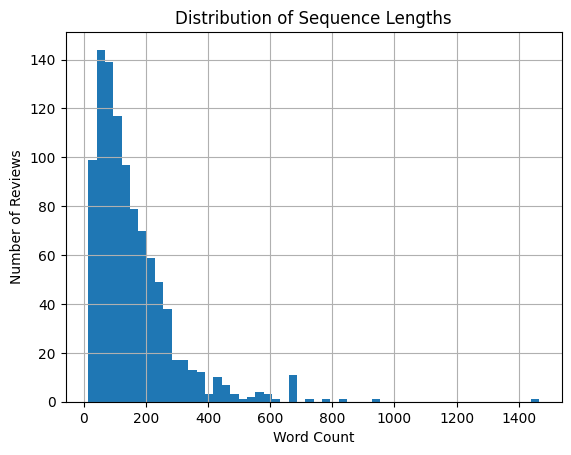

In [10]:
# Make histogram of sequence lengths
ax = df['sequence_length'].hist(bins = 'auto')
ax.set_xlabel('Word Count')
ax.set_ylabel('Number of Reviews')
ax.set_title('Distribution of Sequence Lengths');

In [11]:
# Define X
X = df['job_description']
# Define y
y = df['salary_usd']

In [12]:
# Convert to Dataset Object
ds = tf.data.Dataset.from_tensor_slices((X, y))
# Shuffle dataset
ds = ds.shuffle(buffer_size=len(ds),reshuffle_each_iteration=False)

In [13]:
# Set the ratio of the train, validation, test split
split_train = .7
split_val =  .2
split_test =  1 -( split_train + split_val )
# Calculate the number of samples for training and validation data
n_train_samples =  int(len(ds) * split_train)
n_val_samples = int(len(ds) * split_val)
n_test_samples = len(ds) -(n_train_samples + n_val_samples)

In [14]:
import math
BATCH_SIZE =32
import math
# math.ceil will round up
# How many batches?
n_train_batches = math.ceil(n_train_samples/BATCH_SIZE)
n_val_batches = math.ceil(n_val_samples/BATCH_SIZE)
n_test_batches = math.ceil(n_test_samples/BATCH_SIZE)
print(f"    - train:\t{n_train_samples} samples \t({n_train_batches} batches)")
print(f"    - val:  \t{n_val_samples} samples \t({n_val_batches} batches)")
print(f"    - test: \t{n_test_samples} samples \t({n_test_batches} batches)")

    - train:	700 samples 	(22 batches)
    - val:  	200 samples 	(7 batches)
    - test: 	100 samples 	(4 batches)


In [15]:
# Use take and skip to define each set
train_ds = ds.take(n_train_samples).batch(batch_size=BATCH_SIZE)
# Skip over the training batches and take the validation batches
val_ds = ds.skip(n_train_samples).take(n_val_samples).batch(batch_size=BATCH_SIZE)
# Skipver the train and validation batches, the remaining are the test batches
test_ds = ds.skip(n_train_samples + n_val_samples).batch(batch_size=BATCH_SIZE)

In [ ]:
# Confirm len of train_ds
len(train_ds)

22

In [16]:
def make_text_vectorization_layer(train_ds,  max_tokens=None,
                                  split='whitespace',
                                  standardize="lower_and_strip_punctuation",
                                  output_mode="int",
                                  output_sequence_length=None,
                                  ngrams=None, pad_to_max_tokens=False,
                                  verbose=True,
                                  **kwargs,
                                 ):
    # Build the text vectorization layer
    text_vectorizer = tf.keras.layers.TextVectorization(
        max_tokens=max_tokens,
        standardize=standardize,
        output_mode=output_mode,
        output_sequence_length=output_sequence_length,
        **kwargs
    )
    # Get just the text from the training data
    if isinstance(train_ds, (np.ndarray, list, tuple, pd.Series)):
        ds_texts = train_ds
    else:
        try:
            ds_texts = train_ds.map(lambda x, y: x )
        except:
            ds_texts = train_ds

    # Fit the layer on the training texts
    text_vectorizer.adapt(ds_texts)


    if verbose:
        # Print the params
        print( "\ntf.keras.layers.TextVectorization(" )
        config = text_vectorizer.get_config()
        pprint(config,indent=4)
        print(")")

    # SAVING VOCAB FOR LATER
    # Getting list of vocab
    vocab = text_vectorizer.get_vocabulary()
    # Save dictionaries to look up words from ints
    int_to_str  = {idx:word for idx, word in enumerate(vocab)}

    return text_vectorizer, int_to_str


# Define vectorizer layer. Use the custom function to build and fit the vectorizer before using it in model
count_vectorizer, count_lookup = make_text_vectorization_layer(train_ds, output_mode='count',
                                                                        verbose=True)


tf.keras.layers.TextVectorization(
{   'dtype': {   'class_name': 'DTypePolicy',
                 'config': {'name': 'float32'},
                 'module': 'keras',
                 'registered_name': None},
    'encoding': 'utf-8',
    'idf_weights': None,
    'max_tokens': None,
    'name': 'text_vectorization',
    'ngrams': None,
    'output_mode': 'count',
    'output_sequence_length': None,
    'pad_to_max_tokens': False,
    'ragged': False,
    'sparse': False,
    'split': 'whitespace',
    'standardize': 'lower_and_strip_punctuation',
    'trainable': True,
    'vocabulary': None,
    'vocabulary_size': 8141}
)


In [ ]:
# Check the size of the vocabulary
len(count_vectorizer.get_vocabulary())

8141

In [17]:
def build_bow_model(text_vectorization_layer, name=None):
    bow_model = tf.keras.models.Sequential([
        text_vectorization_layer
    ], name=name)

    bow_model.add(layers.Dense(64, activation='relu'))
    bow_model.add(layers.Dense(32, activation='relu'))

    bow_model.add(layers.Dense(1))

    bow_model.compile(
        loss='mean_squared_error',
        optimizer=optimizers.Adam(learning_rate=0.001),
        metrics=['mean_absolute_error']
    )

    bow_model.summary()
    return bow_model


bow_model = build_bow_model(count_vectorizer, name="BoW-Counts")

Model: "BoW-Counts"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ ?                           │     0 (unbuilt) │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 30
history = bow_model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step - loss: 1075818752.0000 - mean_absolute_error: 3386.9146 - val_loss: 5384758.0000 - val_mean_absolute_error: 1486.8856
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 325ms/step - loss: 1075691008.0000 - mean_absolute_error: 3375.5359 - val_loss: 5303421.5000 - val_mean_absolute_error: 1469.9290
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 314ms/step - loss: 1075504640.0000 - mean_absolute_error: 3357.6494 - val_loss: 5179306.0000 - val_mean_absolute_error: 1443.6357
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step - loss: 1075222784.0000 - mean_absolute_error: 3330.3728 - val_loss: 5001388.5000 - val_mean_absolute_error: 1405.3344
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 324ms/step - loss: 1074819456.0000 - mean_absolute_error: 3291.2166 - val_loss: 4758692.0000 - val_mean_absolute_error: 1351.4712
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 368ms/step - loss: 1074255872.0000 - mean_absolute_error: 3236.8176 - val_loss: 4450822.5000 - val_mea

In [ ]:
# evaluate_classification_network(
#     bow_model, X_train=train_ds,
#     X_test=test_ds, history=history
# );

In [ ]:
# Define sequence length as a variable for future use
SEQUENCE_LENGTH = 400
# Define vectorizer layer. Use the custom function to build and fit the vectorizer before using it in model
sequence_vectorizer, vocab_lookup = make_text_vectorization_layer(train_ds, output_mode='int', output_sequence_length = SEQUENCE_LENGTH, verbose=True)
# Check the size of the vocabulary
VOCAB_SIZE = len(sequence_vectorizer.get_vocabulary())
# Get the size of the vocabulary
VOCAB_SIZE = sequence_vectorizer.vocabulary_size()



tf.keras.layers.TextVectorization(
{   'dtype': {   'class_name': 'DTypePolicy',
                 'config': {'name': 'float32'},
                 'module': 'keras',
                 'registered_name': None},
    'encoding': 'utf-8',
    'idf_weights': None,
    'max_tokens': None,
    'name': 'text_vectorization_1',
    'ngrams': None,
    'output_mode': 'int',
    'output_sequence_length': 400,
    'pad_to_max_tokens': False,
    'ragged': False,
    'sparse': False,
    'split': 'whitespace',
    'standardize': 'lower_and_strip_punctuation',
    'trainable': True,
    'vocabulary': None,
    'vocabulary_size': 8142}
)


In [ ]:
def build_lstm_model(text_vectorization_layer, vocab_size, embed_dim, sequence_length):
    lstm_model = Sequential([
        text_vectorization_layer,
        layers.Embedding(
            input_dim=vocab_size,
            output_dim=embed_dim,
            input_length=sequence_length
        )
    ])

    lstm_model.add(layers.LSTM(128, return_sequences=False))

    lstm_model.add(layers.Dense(1))

    lstm_model.compile(
        optimizer=optimizers.Adam(learning_rate=0.01),
        loss='mean_squared_error',
        metrics=['mean_absolute_error']
    )

    lstm_model.summary()
    return lstm_model

# Hyperparameters
VOCAB_SIZE = 20000
EMBED_DIM = 128
SEQUENCE_LENGTH = 100

# Build the regression model
lstm_regression_model = build_lstm_model(
    text_vectorization_layer=count_vectorizer,
    vocab_size=VOCAB_SIZE,
    embed_dim=EMBED_DIM,
    sequence_length=SEQUENCE_LENGTH
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ (None, 8141)                │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = lstm_regression_model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 504s 23s/step - loss: 1075775104.0000 - mean_absolute_error: 3377.8823 - val_loss: 5349302.5000 - val_mean_absolute_error: 1468.4655
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 571s 23s/step - loss: 1075619840.0000 - mean_absolute_error: 3355.7087 - val_loss: 5300835.0000 - val_mean_absolute_error: 1451.9877
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 506s 23s/step - loss: 1075510528.0000 - mean_absolute_error: 3339.4219 - val_loss: 5255325.0000 - val_mean_absolute_error: 1436.5444
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 559s 23s/step - loss: 1075406592.0000 - mean_absolute_error: 3323.8103 - val_loss: 5211423.0000 - val_mean_absolute_error: 1421.4847
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 510s 23s/step - loss: 1075304960.0000 - mean_absolute_error: 3308.5413 - val_loss: 5168686.5000 - val_mean_absolute_error: 1406.6664
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 558s 23s/step - loss: 1075205248.0000 - mean_absolute_error: 3293.4985 - val_loss: 5126901.0000 - val_mean_

In [ ]:
lstm_regression_model.save('/content/drive/MyDrive/csv data /lstm_regression_model.h5')

In [ ]:
from sklearn.metrics import mean_squared_error

# Evaluate the model on the test dataset and calculate RMSE
def calculate_rmse(model, dataset):
    true_values = []
    predictions = []

    for batch in dataset:
        inputs, targets = batch
        preds = model.predict(inputs)

        # Collect true values and predictions
        true_values.extend(targets.numpy())
        predictions.extend(preds.flatten())

    # Compute RMSE
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    return rmse

In [ ]:
# Calculate RMSE on the test dataset
rmse = calculate_rmse(lstm_regression_model, test_ds)
print(f"Test RMSE: {rmse:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
Test RMSE: 2032.7698


In [ ]:
# Calculate RMSE on the test dataset
rmse = calculate_rmse(lstm_regression_model, train_ds)
print(f"Train RMSE: {rmse:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Train RMSE: 23269.8555


In [ ]:
# Calculate RMSE on the test dataset
rmse = calculate_rmse(bow_model, train_ds)
print(f"Train RMSE: {rmse:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Train RMSE: 22614.6570


In [ ]:
# Calculate RMSE on the test dataset
rmse = calculate_rmse(bow_model, test_ds)
print(f"Test RMSE: {rmse:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Test RMSE: 1879.4019


In [ ]:
!pip install transformers

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda

# Load tokenizer and model
bert_model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
bert_model = TFBertModel.from_pretrained(bert_model_name)

# Input layers
input_ids = Input(shape=(512,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(512,), dtype=tf.int32, name='attention_mask')

# Convert inputs to proper TensorFlow format
def process_bert_inputs(inputs):
    return bert_model(input_ids=inputs[0], attention_mask=inputs[1]).pooler_output

# Use Lambda for embedding extraction and define output shape
embeddings = Lambda(process_bert_inputs, output_shape=(768,))([input_ids, attention_mask])

# Add dense layers for regression/classification
output = Dense(1, activation='linear')(embeddings)

# Define the model
regression_model = Model(inputs=[input_ids, attention_mask], outputs=output)
regression_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

regression_model.summary()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)    │ (None, 512)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_mask            │ (None, 512)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_3 (Lambda)         │ (None, 768)            │              0 │ input_ids[0][0],       │
│                           │                        │                │ attention_mask[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1)              │            769 │ lambda_3[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Layer

class BERTEmbeddingLayer(Layer):
    def __init__(self, bert_model, **kwargs):
        super(BERTEmbeddingLayer, self).__init__(**kwargs)
        self.bert_model = bert_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.bert_model(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.pooler_output

# Use the custom BERT embedding layer
bert_embeddings = BERTEmbeddingLayer(bert_model)([input_ids, attention_mask])
output = Dense(1, activation='linear')(bert_embeddings)

# Define the model
regression_model = Model(inputs=[input_ids, attention_mask], outputs=output)
regression_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

regression_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)    │ (None, 512)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_mask            │ (None, 512)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_embedding_layer      │ (None, 768)            │              0 │ input_ids[0][0],       │
│ (BERTEmbeddingLayer)      │                        │                │ attention_mask[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │            769 │ bert_embedding_layer[… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
def preprocess_texts(texts, tokenizer, max_len=512):
    encodings = tokenizer(
        texts.tolist(),
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )
    return encodings['input_ids'], encodings['attention_mask']

# Preprocess training data
train_input_ids, train_attention_mask = preprocess_texts(X_train, tokenizer)

# Train the model
history = regression_model.fit(
    [train_input_ids, train_attention_mask],
    y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=16
)


Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1650s 43s/step - loss: 1344071680.0000 - mean_absolute_error: 3789.0540 - val_loss: 21962448.0000 - val_mean_absolute_error: 1813.3329
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1633s 43s/step - loss: 1344070784.0000 - mean_absolute_error: 3788.8916 - val_loss: 21961814.0000 - val_mean_absolute_error: 1813.1606
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1602s 42s/step - loss: 1344069248.0000 - mean_absolute_error: 3788.7197 - val_loss: 21961142.0000 - val_mean_absolute_error: 1812.9794
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1643s 42s/step - loss: 1344067840.0000 - mean_absolute_error: 3788.5410 - val_loss: 21960456.0000 - val_mean_absolute_error: 1812.7937
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1603s 42s/step - loss: 1344066560.0000 - mean_absolute_error: 3788.3582 - val_loss: 21959766.0000 - val_mean_absolute_error: 1812.6055


In [ ]:
# Preprocess test data
test_input_ids, test_attention_mask = preprocess_texts(X_test, tokenizer)

# Generate predictions
predictions = regression_model.predict([test_input_ids, test_attention_mask])


8/8 ━━━━━━━━━━━━━━━━━━━━ 622s 78s/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 2187.3560117952075
Mean Squared Error (MSE): 119649089.41917147
Root Mean Squared Error (RMSE): 10938.422620248839
R² Score: -0.04164706094118609


In [ ]:
# Evaluate the model
results = regression_model.evaluate(
    [test_input_ids, test_attention_mask],
    y_test,
    batch_size=16
)

# Display results
print(f"Test Loss: {results[0]}")  # Loss (MSE)
print(f"Test MAE: {results[1]}")   # Mean Absolute Error


16/16 ━━━━━━━━━━━━━━━━━━━━ 539s 33s/step - loss: 148966672.0000 - mean_absolute_error: 2468.0308
Test Loss: 119649080.0
Test MAE: 2187.35595703125


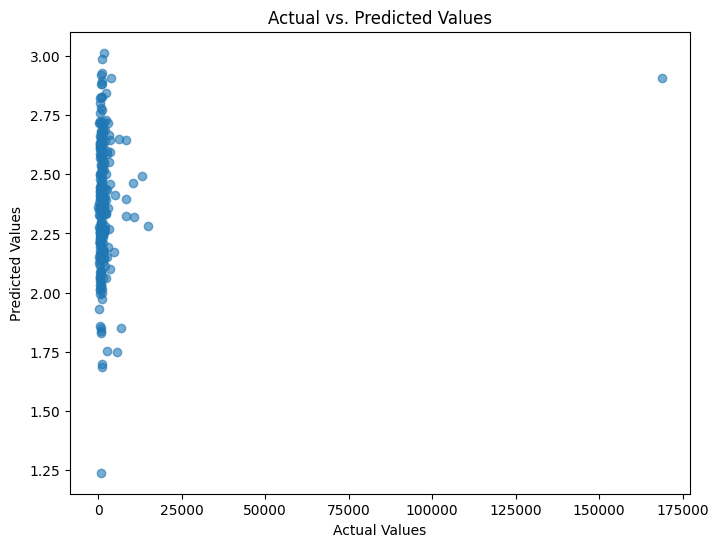

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for predictions vs. true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


## Poor quality using RNN and BERT